In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('IRIS.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df=df.iloc[:,1:]

In [6]:
df

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
145,3.0,5.2,2.3,Iris-virginica
146,2.5,5.0,1.9,Iris-virginica
147,3.0,5.2,2.0,Iris-virginica
148,3.4,5.4,2.3,Iris-virginica


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [8]:
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [9]:
df=df[df['species']!=0][['sepal_width','petal_length','species']]

In [10]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


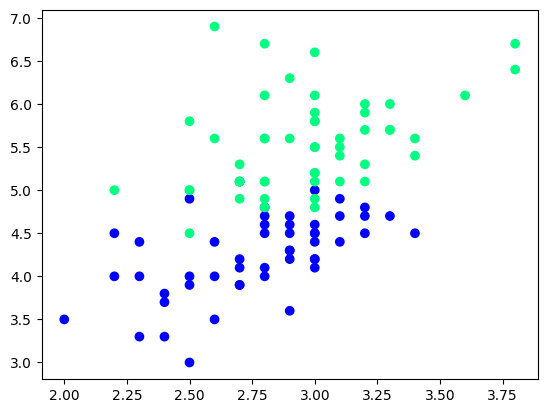

In [11]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

# Applying Bootstrapping

In [12]:
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [13]:
df_train

,sepal_width,petal_length,species
57,2.4,3.3,1
119,2.2,5.0,2
125,3.2,6.0,2
140,3.1,5.6,2
126,2.8,4.8,2
70,3.2,4.8,1
149,3.0,5.1,2
79,2.6,3.5,1
144,3.3,5.7,2
138,3.0,4.8,2


In [14]:
df_test

,sepal_width,petal_length,species
59,2.7,3.9,1
55,2.8,4.5,1
136,3.4,5.6,2
74,2.9,4.3,1
141,3.1,5.1,2


In [15]:
df_val

,sepal_width,petal_length,species
67,2.7,4.1,1
130,2.8,6.1,2
115,3.2,5.3,2
133,2.8,5.1,2
134,2.6,5.6,2


In [21]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [22]:
X_test

array([[2.7, 4.1],
       [2.8, 6.1],
       [3.2, 5.3],
       [2.8, 5.1],
       [2.6, 5.6]])

In [23]:
y_test

array([1, 2, 2, 2, 2])

# Case1 - Bagging

# training decision tree

In [25]:
# data for tree 1
df_bag=df_train.sample(8,replace=True) # by using replace we are doing sampling with replacement

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [27]:
dt_bag1=DecisionTreeClassifier()

In [29]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf, legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

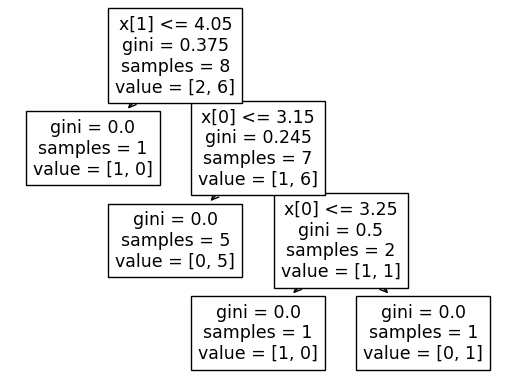

/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


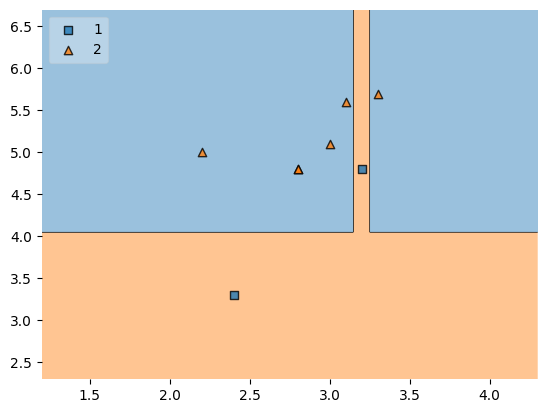

In [30]:
evaluate(dt_bag1,X,y)

In [31]:
# data for tree 2
df_bag=df_train.sample(8,replace=True) # by using replace we are doing sampling with replacement

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
149,3.0,5.1,2
79,2.6,3.5,1
138,3.0,4.8,2
144,3.3,5.7,2
70,3.2,4.8,1
138,3.0,4.8,2
125,3.2,6.0,2
144,3.3,5.7,2


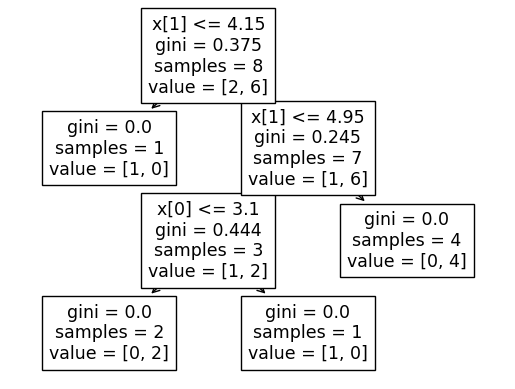

/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


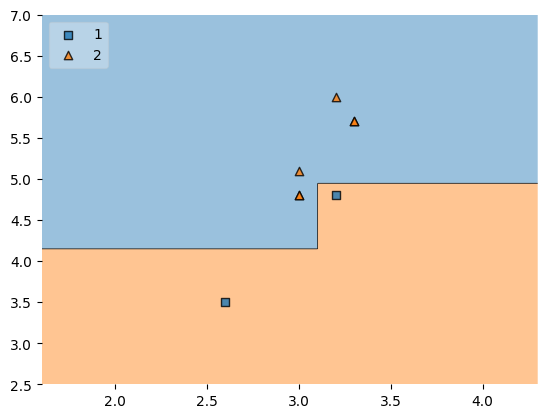

In [32]:
dt_bag2=DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [33]:
# data for tree 3
df_bag=df_train.sample(8,replace=True) # by using replace we are doing sampling with replacement

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
57,2.4,3.3,1
119,2.2,5.0,2
140,3.1,5.6,2
126,2.8,4.8,2
140,3.1,5.6,2
144,3.3,5.7,2
70,3.2,4.8,1
149,3.0,5.1,2


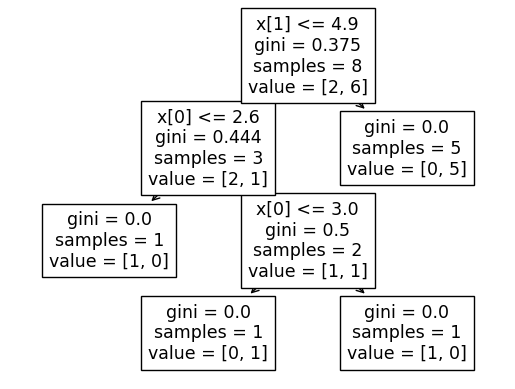

/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


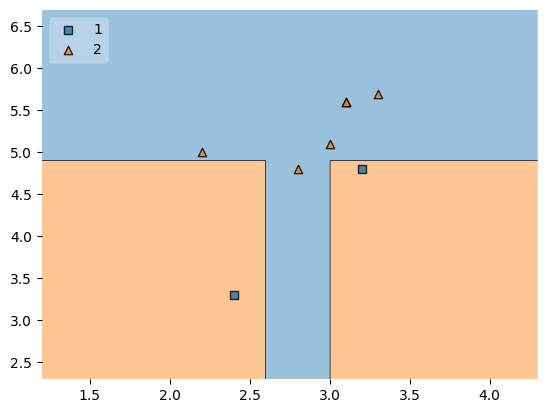

In [35]:
dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

# Aggregation

In [36]:
df_test

,sepal_width,petal_length,species
59,2.7,3.9,1
55,2.8,4.5,1
136,3.4,5.6,2
74,2.9,4.3,1
141,3.1,5.1,2


In [39]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,4.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,4.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,4.7]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/home/zuhaib/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
